# Marginal distributions

In this notebook we describe some methods of finding marginal distributions given joint distribution on a non-rectangular area.

In [1]:
# import plotting facilities
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Continuous distributions

Continuous distribution of a two-dimensional random vector $(X,Y)$ is described by a density function $f(x,y),\;(x,y)\in D$, where $D$ is a domain for $(X,Y)$, that is, $P((X,Y)\in D)=1$.

### Problem 1

Given a distribution with density function $f(x,y)=a(x+2y)$ in the triangle $D=\{x\geq0,\;y\geq0,\;x+y\leq1\}$, as shown in the figure below.

<img src='triang_domain.jpg'></img>

Find the constant $a$ and compute the margimal density functions $f_X(x),\;f_y(y),\;x,y\in[0,1]$.

### Solution

First note that $$ \int_D f(x,y)\,dx\,dy=1, $$ so we must have $$ a\int_0^1\left(\int_0^{1-x} (x+2y)\,dy\right)dx=a\int_0^1 \left(x(1-x)+(1-x)^2\right)\,dx=a\int_0^1(1-x)\,dx=a\,\frac{1}{2}=1, $$ so $$ a=2. $$ Next, for the marginal density of $X$ we have $$ f_X(x)=\int_0^{1-x} f(x,y)\,dy=2\int_0^{1-x}(x+2y)\,dy=2(1-x),\;x\in[0,1]. $$ Similarly, $$ f_Y(y)=\int_0^{1-y} f(x,y)\,dx=2\int_0^{1-y}(x+2y)\,dx=(1-y)(1+3y),\;y\in[0,1]. $$

### Illustration

Let us present plots of marginal densities $f_X$ and $f_Y$.

In [2]:
# define functions for computing marginal densities
def marg_x(x):
    """ marginal density of X """
    return 2 * (1 - x)

def marg_y(y):
    """ marginal density of y """
    return (1 - y) * (1 + 3 * y)

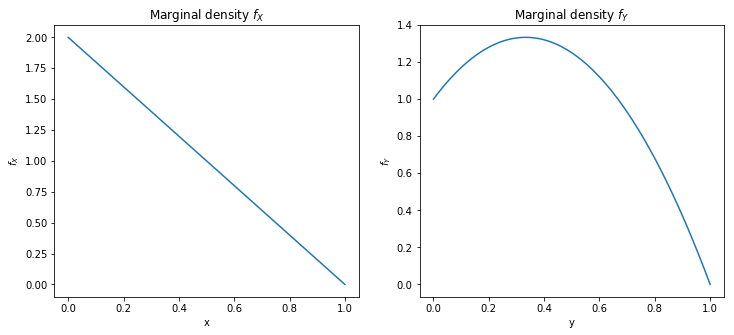

In [3]:
# create plots

# functions argument data
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

# figures
figsize(12, 5)
subplot(1, 2, 1)
plot(x, marg_x(x))
xlabel('x')
ylabel('$f_X$')
title('Marginal density $f_X$')
subplot(1, 2, 2)
plot(y, marg_y(y))
xlabel('y')
ylabel('$f_Y$')
ti = title('Marginal density $f_Y$')

### Addendum to the problem 1: computing CDF

Let us compute the cumulative distribution function for the density defined in the triangle $$ f(x,y)=2(x+2y),\;\;\; x\geq0,\;y\geq0,\;x+y\leq1. $$ For any fixed pair $(x,y)\in D$ we have $$ F(x,y)=\int_0^x\int_0^y f(\tau,\theta)\,d\theta d\tau = 2\int_0^x\int_0^y (\tau+2\theta)\,d\theta d\tau = 2\int_0^x (y\tau+y^2)\,d\tau = yx^2+2xy^2, $$ see figure below.

<img src='triang_domain_1.jpg'></img>

For $0\leq x\leq1,\,0\leq y\leq1,\,x+y>1$ calculation is illustrated in the next figure.
<img src='triang_domain_2.jpg'></img>

In this case integration is implemented over the pentagon $(\tau,\theta)$ consiting of a rectangle for $0\leq\theta\leq y,\;0\leq\tau\leq1-y$ and a tralezoid for $1-y\leq\tau\leq x,\;0\leq\theta\leq 1-\tau$. Integration yields $$ F(x,y)=F(1-y,y)+2\int_{1-y}^x\int_0^{1-\tau}(\tau+2\theta)\,d\theta\,d\tau = y(1-y)^2+2(1-y)y^2+2\int_{1-y}^x(1-\tau)\,d\tau=y+y^2-y^3-(1-x)^2. $$

Summarizing, we have for $(x,y)\in[0,1]\times[0,1]$: $$ F(x,y)=\left\{\begin{array}{ll}yx^2+2xy^2,&x+y\leq1,\\ y+y^2-y^3-(1-x)^2,&x+y>1\end{array}\right. $$

Let us illustrate this CDF with plots.

In [4]:
# defining CDF function
def joint_cdf(x, y):
    """ """
    x, y = np.meshgrid(x, y)
    m, n = x.shape
    ind = (x >= 0) & (y >= 0)
    indl = ind & (x + y <= 1)
    indg = ind & (x + y > 1)
    return (y * x ** 2 + 2 * x * y ** 2) * indl + (y + y ** 2 - y ** 3 - (1 - x) ** 2) * indg

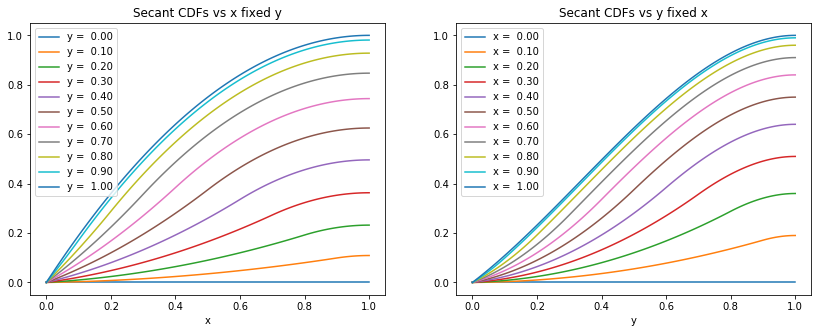

In [5]:
# show plots
figsize(14,5)
subplot(1,2,1)
x = np.linspace(0,1,101)
y = np.linspace(0,1,11)
for yy in y:
    plot(x, joint_cdf(x, yy).T, label='y = {0:5.2f}'.format(yy))
title('Secant CDFs vs x fixed y')
xlabel('x')
le = legend()

subplot(1,2,2)
y = np.linspace(0,1,101)
x = np.linspace(0,1,11)
for xx in x:
    plot(y, joint_cdf(xx, y), label='x = {0:5.2f}'.format(xx))
title('Secant CDFs vs y fixed x')
xlabel('y')
le = legend()